# 2021/12/30
# 本代码绘制论文version1.2中的fig7
# 内容为逐日的海温与2m风

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl

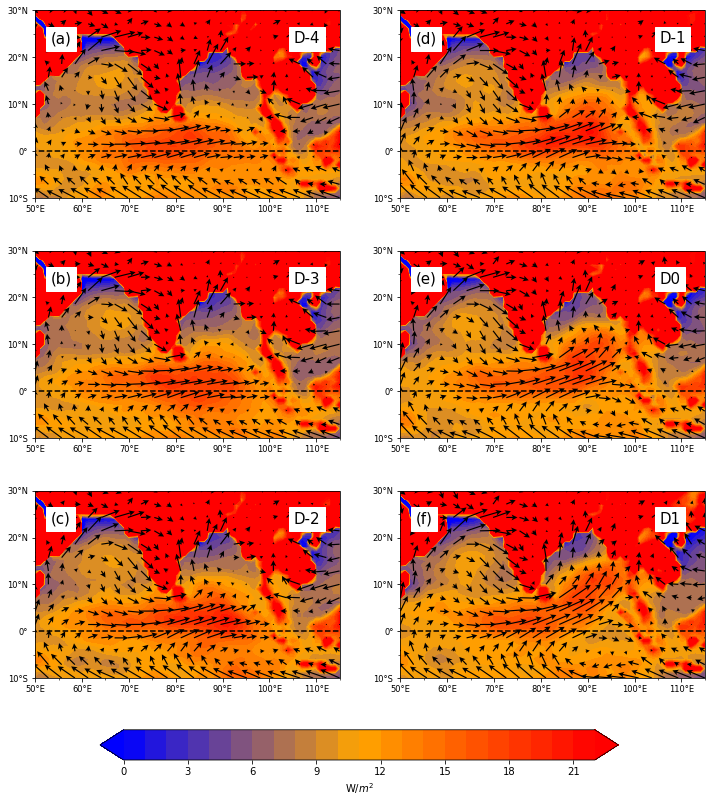

In [6]:
path  =  "/home/sun/qomo-data/"
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  50,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

f1  =  xr.open_dataset(path+"composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice)   
#f2  =  xr.open_dataset(path+"composite_OISST.nc").sel(lon=lon_slice,lat=lat_slice)  
f2  =  xr.open_dataset(path+"composite_shlh.nc").sel(lon=lon_slice,lat=slice(40,-15)) 

date  =  [-4,-3,-2,-1,0,1]
dates =  [26,27,28,29,30,31]

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['blue','orange','red']

newcmp = LinearSegmentedColormap.from_list('aabb',clist)

number =  ["a","b","c","d","e","f"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=2)

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contourf(f2.lon,f2.lat,-1*f2.SSHF[dates[j]]/86400,np.linspace(0,22,23),cmap=newcmp,alpha=1,extend='both')
            q  =  ax.quiver(f1.lon, f1.lat, f1.U2M.data[dates[j],:], f1.V2M.data[dates[j],:], 
                            regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                            scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                            units='xy', width=0.25,
                            transform=proj,
                            color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)
            ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
        
            j += 1

    
fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='W/${m^2}$')

#plt.savefig("/home/sun/paint/lunwen/version1.2/fig6_version1.2_2m_sh.pdf",dpi=300)

In [11]:
#print(newcmp)
test1 = cm.get_cmap('newcmp',8)
print(test1(0.5))

ValueError: 'newcmp' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

# 计算涡度

In [6]:
# 计算四月平均涡度
f1  =  xr.open_dataset(path+"composite-merra2-single.nc")
disy,disx,location = cal_xydistance(f1.lat,f1.lon)

vx  =  f1.U2M.data.copy() ; uy  =  vx.copy()

for i in range(1,180):
    vx[:,i,:]  =  np.gradient(f1.V2M.data[:,i,:],disx[i],axis=1)
    
uy  =  np.gradient(f1.U2M.data,location,axis=1)

april_mean_vor  =  np.average(vx[0:30,:],axis=0)  -  np.average(uy[0:30,:],axis=0)
vorticity       =  vx - uy

ncfile   =  xr.Dataset(
    {
        "april_vorticity": (["lat", "lon"], april_mean_vor),
        "vorticity": (["time","lat","lon"], vorticity),
    },
    coords={
        "lon": (["lon"], f1.lon.data),
        "lat": (["lat"], f1.lat.data),
        "time": (["time"], f1.time.data),
    },
)

In [11]:
path  =  "/home/sun/qomo-data/"
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  50,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

f1  =  xr.open_dataset(path+"composite-merra2-single.nc").sel(time=slice(1,35))
f2  =  xr.open_dataset(path+"composite_shlh_liuxl.nc").sel(time=slice(1,35))
f3  =  ncfile.sel(lon=slice(70,100),lat=slice(-5,20)) 

# 屏蔽陆地感热
f_mask  =  xr.open_dataset("/home/sun/data/merra2_mask_1x1.nc")
mask    =  f_mask.mask_1x1.data
# 只保留海域的把陆地的给mask掉
sh      =  f2.SSHF.data
u2m     =  f1.U2M.data
v2m     =  f1.V2M.data

for tt in range(35):
    for i in range(181):
        for j in range(360):
            if mask[i,j] > 0.8:
                sh[tt,i,j]   =  np.nan
                vorticity[tt,i,j]  =  np.nan


# 打包
ncfile_nan   =  xr.Dataset(
    { 
        "sh": (["time","lat", "lon"], sh),
        "u2m": (["time","lat","lon"], u2m),
        "v2m": (["time","lat","lon"], v2m),
    },
    coords={
        "lon": (["lon"], f1.lon.data),
        "lat": (["lat"], f1.lat.data),
        "time": (["time"], f1.time.data),
    },
)

ncfile   =  xr.Dataset(
    {
        "april_vorticity": (["lat", "lon"], april_mean_vor),
        "vorticity": (["time","lat","lon"], vorticity),
    },
    coords={
        "lon": (["lon"], f1.lon.data),
        "lat": (["lat"], f1.lat.data),
        "time": (["time"], f1.time.data),
    },
)

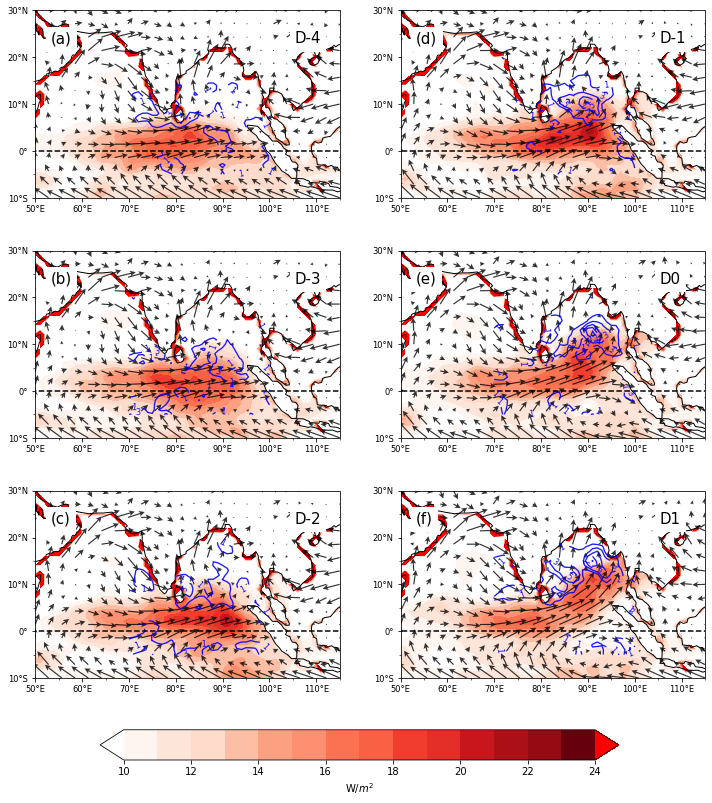

In [16]:
date  =  [-4,-3,-2,-1,0,1]
dates =  [26,27,28,29,30,31]

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('Reds', 22)
newcolors = viridis(np.linspace(0, 1, 22))
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
newcmp.set_over('red')

number =  ["a","b","c","d","e","f"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=2)

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im1  =  ax.contourf(ncfile_nan.lon,ncfile_nan.lat,-1*ncfile_nan.sh[dates[j]]/86400,np.linspace(10,24,15),cmap=newcmp,alpha=1,extend='both')
            im2  =  ax.contour(f3.lon,f3.lat,1e6*(f3.vorticity.data[dates[j],:]-f3.vorticity.data[dates[j]-1,:]),np.linspace(1,11,6),colors='b',alpha=0.9,linewidths=1.3)
            ax.clabel(im2, np.linspace(1,11,6).astype(int), inline=True, fontsize=8)
            q  =  ax.quiver(f1.lon, f1.lat, ncfile_nan.u2m.data[dates[j],:], ncfile_nan.v2m.data[dates[j],:], 
                            regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                            scale_units='xy', scale=1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                            units='xy', width=0.25,
                            transform=proj,
                            color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5,alpha=0.8)
            ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
        
            j += 1

    
fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im1, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='W/${m^2}$')

plt.savefig("/home/sun/paint/lunwen/version1.3-20220108/fig6_version1.3_2m_sh_vorticity.pdf",dpi=300)